In [ ]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

# load doc into memory

def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
filename = 'C:/HTTM/VietnameseToEnglish/vie.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-vie.pkl')
# spot check
for i in range(200):
	print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))
	

Saved: english-vie.pkl
[run] => [chạy]
[help] => [giúp tôi với]
[go on] => [tiếp tục đi]
[hello] => [chào bạn]
[hurry] => [nhanh lên nào]
[eat it] => [ăn đi]
[eat it] => [ăn nó đi]
[help me] => [cứu tôi với]
[i agree] => [tôi cũng nghĩ như vậy]
[perfect] => [hoàn hảo]
[we know] => [chúng tôi biết]
[we know] => [chúng ta biết]
[you run] => [bạn chạy]
[cheer up] => [đừng có rầu rĩ quá như thế]
[he tries] => [hắn thử]
[he tries] => [anh thử]
[hurry up] => [thoáng cái chân lên]
[i forgot] => [tôi quên mất rồi]
[im bald] => [tôi bị hói]
[im busy] => [tôi đang bận]
[too late] => [muộn quá]
[i hate tv] => [tôi ghét ti vi]
[i laughed] => [tôi đã cười]
[i laughed] => [tôi cười]
[i will go] => [tôi sẽ đi]
[its cold] => [lạnh]
[its ours] => [đó là của chúng tôi]
[its ours] => [đó là của chúng ta]
[she cried] => [nó đã khóc]
[she cried] => [cô ấy đã khóc]
[sit there] => [hãy ngồi ở đó]
[whats up] => [gì thế]
[whats up] => [có chuyện gì]
[are you ok] => [bạn có sao không]
[find a job] => [hãy tìm m

In [9]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('english-vie.pkl')

# reduce dataset size
n_sentences = 6139
dataset = raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:4500], dataset[4501:]
# save
save_clean_data(dataset, 'english-vie-both.pkl')
save_clean_data(train, 'english-vie-train.pkl')
save_clean_data(test, 'english-vie-test.pkl')
print(dataset)	

Saved: english-vie-both.pkl
Saved: english-vie-train.pkl
Saved: english-vie-test.pkl
[['you dont have to eat it' 'bạn không cần phải ăn nó'
  'ccby france attribution tatoebaorg ck trieuho']
 ['i dont know if i still have it' 'không biết là tôi còn không nữa'
  'ccby france attribution tatoebaorg ck khoaharp']
 ['the snow melted away in a day' 'tuyết tan hết trong một ngày'
  'ccby france attribution tatoebaorg ck trieuho']
 ...
 ['what do you think these are' 'bạn nghĩ những thứ này là cái gì'
  'ccby france attribution tatoebaorg ck']
 ['what time do you usually go to bed'
  'bạn thường hay ngủ vào lúc mấy giờ'
  'ccby france attribution tatoebaorg ck']
 ['tom doesnt talk much about his family'
  'tom không hay nói về gia đình mình'
  'ccby france attribution tatoebaorg hybrid']]


Tiếng Anh:
{1: 9, 2: 66, 3: 377, 4: 850, 5: 1127, 6: 1069, 7: 819, 8: 609, 9: 465, 10: 283, 11: 168, 12: 122, 13: 60, 14: 42, 15: 30, 16: 9, 17: 4, 18: 10, 19: 10, 20: 4, 21: 2, 22: 2, 23: 0, 24: 0, 25: 0}
Tiếng Việt:
{1: 3, 2: 19, 3: 107, 4: 346, 5: 634, 6: 867, 7: 891, 8: 799, 9: 642, 10: 537, 11: 421, 12: 256, 13: 180, 14: 129, 15: 86, 16: 59, 17: 54, 18: 29, 19: 15, 20: 17, 21: 10, 22: 9, 23: 8, 24: 8, 25: 5}


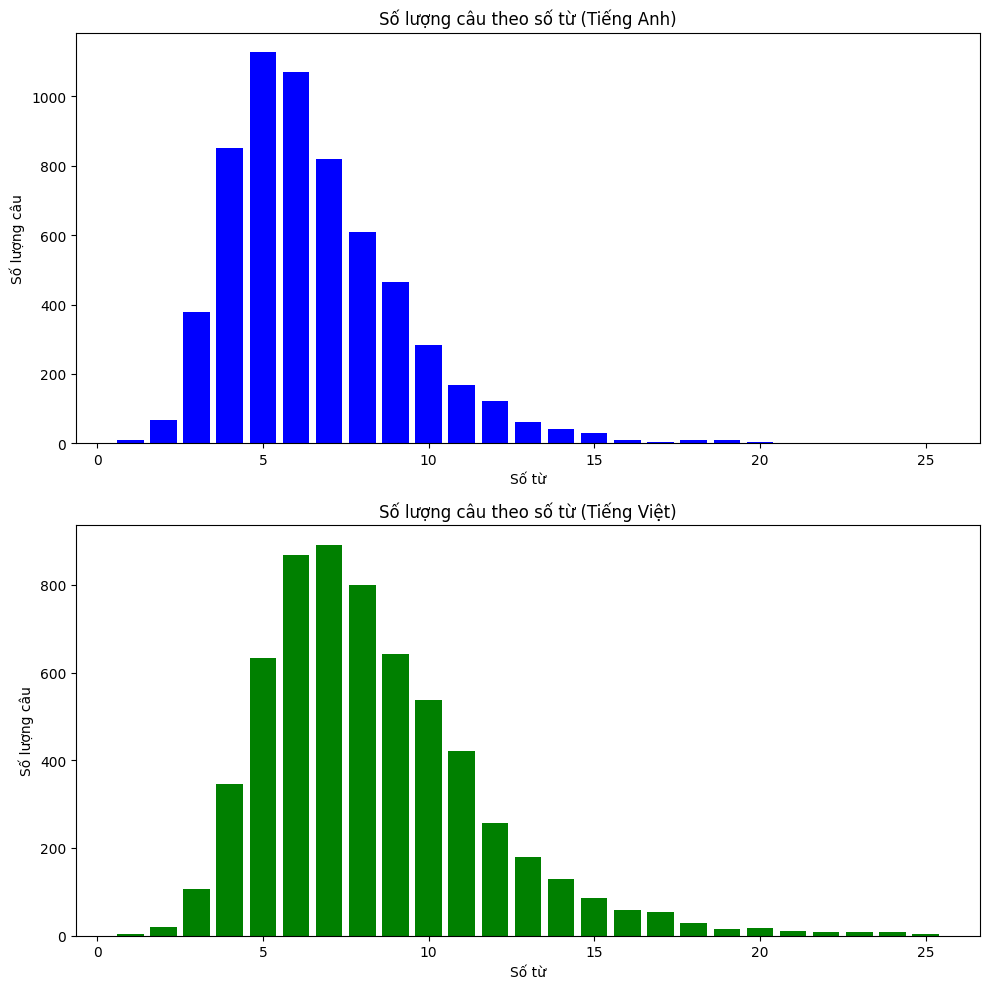

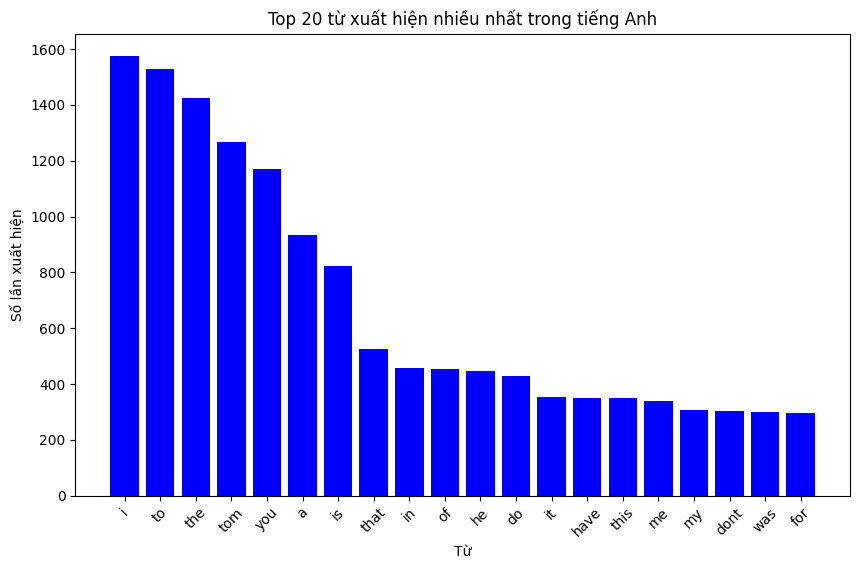

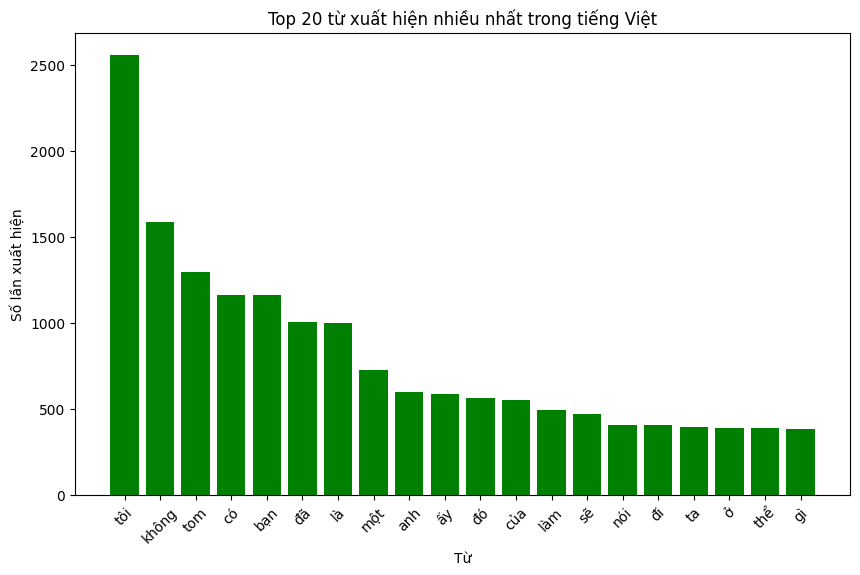

In [10]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import Counter
# Đường dẫn đến tệp .pkl
file_path = "english-vie.pkl"

# Tạo bộ đếm cho số câu tiếng Anh với các độ dài khác nhau
count_dict_english = {1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
count_dict_vie = {1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
# Đọc dữ liệu từ tệp .pkl
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Tách và đếm số chữ trong câu tiếng Anh
for pair in data:
    english_sentence = pair[0]  # Câu tiếng Anh nằm ở vị trí đầu tiên
    word_count = len(english_sentence.split())
    if word_count in count_dict_english:
        count_dict_english[word_count] += 1
for pair in data:
    vie_sentence = pair[1]  # Câu tiếng Viet nằm ở vị trí 2
    word_count = len(vie_sentence.split())
    if word_count in count_dict_vie:
        count_dict_vie[word_count] += 1

def count_words(data):
    eng_counter = Counter()
    vie_counter = Counter()
    for pair in data:
        english_sentence = pair[0]
        vie_sentence = pair[1]
        eng_counter.update(english_sentence.split())
        vie_counter.update(vie_sentence.split())
    return eng_counter, vie_counter

eng_counter, vie_counter = count_words(data)

# Lấy 20 từ xuất hiện nhiều nhất
top_20_eng = eng_counter.most_common(20)
top_20_vie = vie_counter.most_common(20)
# In số câu với số chữ khác nhau
print("Tiếng Anh:")
print(count_dict_english)
print("Tiếng Việt:")
print(count_dict_vie)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Biểu đồ cho tiếng Anh
ax[0].bar(count_dict_english.keys(), count_dict_english.values(), color='blue')
ax[0].set_title('Số lượng câu theo số từ (Tiếng Anh)')
ax[0].set_xlabel('Số từ')
ax[0].set_ylabel('Số lượng câu')

# Biểu đồ cho tiếng Việt
ax[1].bar(count_dict_vie.keys(), count_dict_vie.values(), color='green')
ax[1].set_title('Số lượng câu theo số từ (Tiếng Việt)')
ax[1].set_xlabel('Số từ')
ax[1].set_ylabel('Số lượng câu')

plt.tight_layout()
plt.show()
# Vẽ biểu đồ cho 20 từ xuất hiện nhiều nhất trong tiếng Anh
def plot_top_words(top_words, title, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color=color)
    plt.xlabel('Từ')
    plt.ylabel('Số lần xuất hiện')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(top_20_eng, 'Top 20 từ xuất hiện nhiều nhất trong tiếng Anh', 'blue')
plot_top_words(top_20_vie, 'Top 20 từ xuất hiện nhiều nhất trong tiếng Việt', 'green')

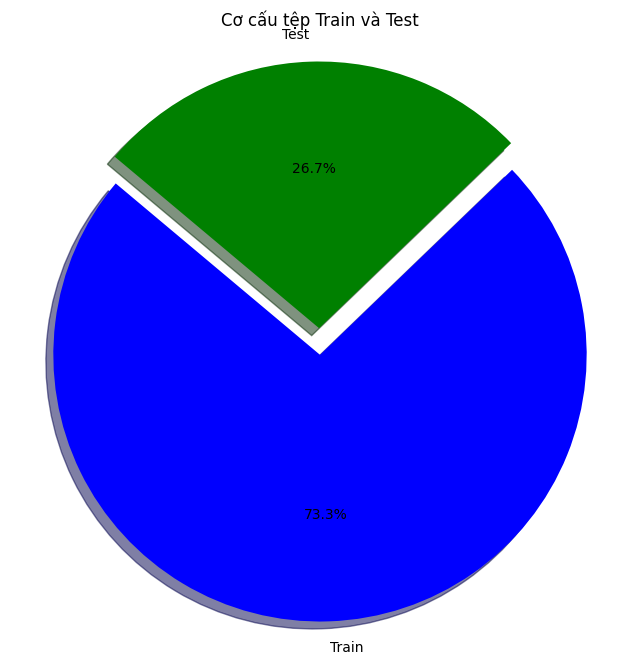

In [11]:
import pickle
import matplotlib.pyplot as plt

# Hàm để tải dữ liệu từ tệp
def load_clean_sentences(filename):
    return pickle.load(open(filename, 'rb'))

# Tải dữ liệu từ các tệp train và test
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

# Đếm tổng số câu trong mỗi tệp
num_train_sentences = len(train)
num_test_sentences = len(test)
#Tính tỷ lệ phần trăm
total_sentences = num_train_sentences + num_test_sentences
train_percentage = (num_train_sentences / total_sentences) * 100
test_percentage = (num_test_sentences / total_sentences) * 100

# Vẽ biểu đồ tròn
labels = ['Train', 'Test']
sizes = [train_percentage, test_percentage]
colors = ['blue', 'green']
explode = (0.1, 0)  # Tách phần 'Train' ra một chút

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.title('Cơ cấu tệp Train và Test')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


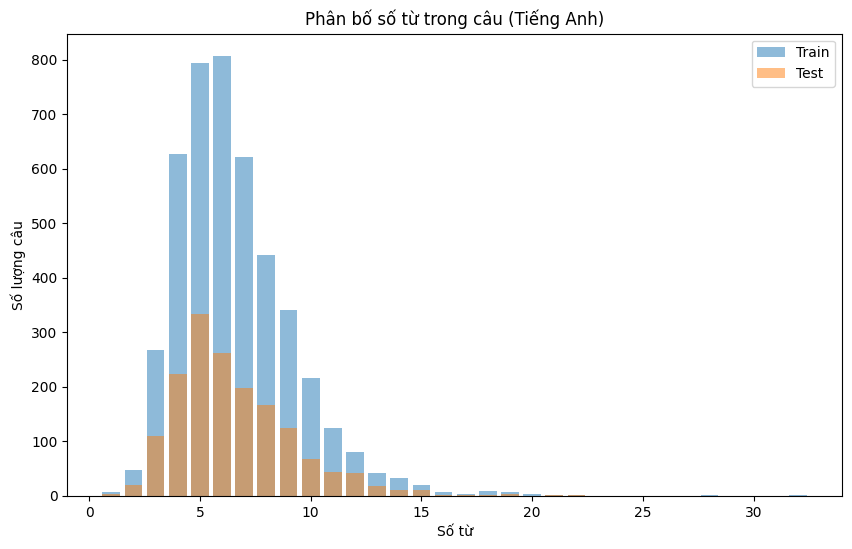

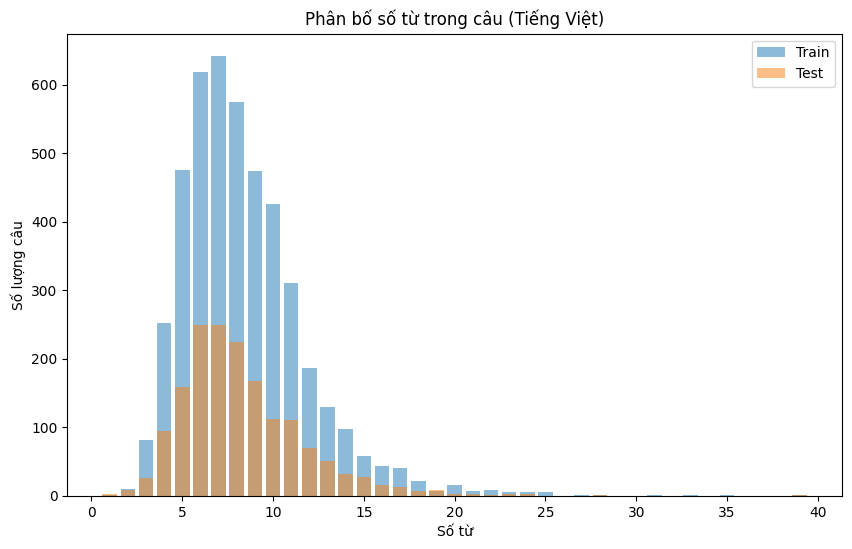

In [12]:
import pickle
import matplotlib.pyplot as plt

# Hàm để tải dữ liệu từ tệp
def load_clean_sentences(filename):
    return pickle.load(open(filename, 'rb'))

# Tải dữ liệu từ các tệp train và test
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

# Hàm để đếm số lượng từ trong mỗi câu
def count_words(data):
    count_dict_english = {}
    count_dict_vie = {}
    for pair in data:
        english_sentence = pair[0]
        vie_sentence = pair[1]
        eng_word_count = len(english_sentence.split())
        vie_word_count = len(vie_sentence.split())
        if eng_word_count in count_dict_english:
            count_dict_english[eng_word_count] += 1
        else:
            count_dict_english[eng_word_count] = 1
        if vie_word_count in count_dict_vie:
            count_dict_vie[vie_word_count] += 1
        else:
            count_dict_vie[vie_word_count] = 1
    return count_dict_english, count_dict_vie

# Đếm số lượng từ trong các câu của tập train và test
train_count_english, train_count_vie = count_words(train)
test_count_english, test_count_vie = count_words(test)

# Vẽ biểu đồ histogram để so sánh phân bố
def plot_histogram(train_count, test_count, title):
    plt.figure(figsize=(10, 6))
    plt.bar(train_count.keys(), train_count.values(), alpha=0.5, label='Train')
    plt.bar(test_count.keys(), test_count.values(), alpha=0.5, label='Test')
    plt.xlabel('Số từ')
    plt.ylabel('Số lượng câu')
    plt.title(title)
    plt.legend()
    plt.show()

# Vẽ biểu đồ cho tiếng Anh
plot_histogram(train_count_english, test_count_english, 'Phân bố số từ trong câu (Tiếng Anh)')

# Vẽ biểu đồ cho tiếng Việt
plot_histogram(train_count_vie, test_count_vie, 'Phân bố số từ trong câu (Tiếng Việt)')


Summary:
Total Simple Sentences: 3262
Total Complex Sentences: 2877


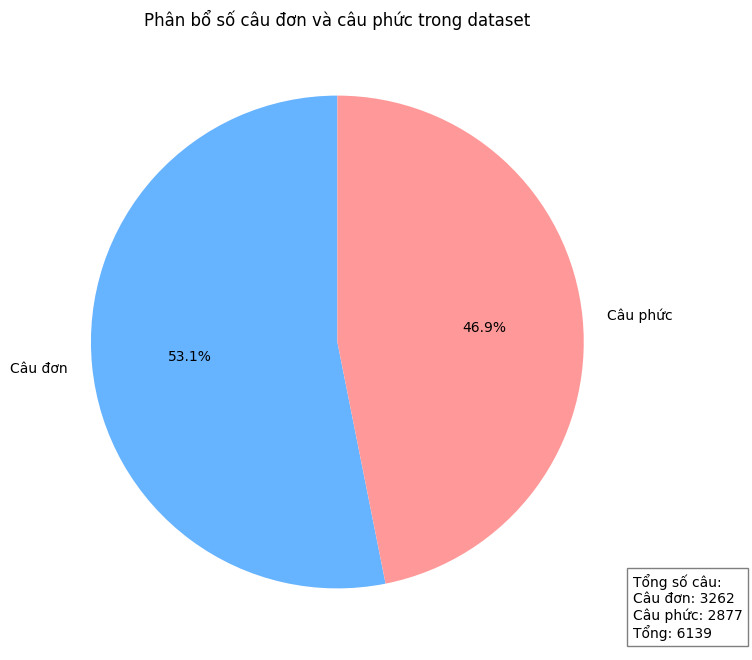

In [9]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Tải mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

def classify_sentence_by_dependency_v2(sentence):
    """
    Phân loại câu đơn/phức tạp dựa trên số lượng cặp chủ-vị ngữ và sự hiện diện của liên từ ('and', 'but', 'or'...).
    """
    doc = nlp(sentence)
    subject_verb_pairs = 0
    conjunctions = ["and", "but", "or", "nor", "for", "so", "yet"]

    # Đếm số lượng cặp chủ-vị ngữ
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject_verb_pairs += 1

    # Phân loại câu dựa trên số cặp chủ-vị ngữ và liên từ
    if subject_verb_pairs > 1:
        return "Complex", subject_verb_pairs
    for token in doc:
        if token.text.lower() in conjunctions:
            return "Complex", subject_verb_pairs

    # Nếu chỉ có một cặp chủ-vị ngữ, câu đơn
    if subject_verb_pairs == 1:
        return "Simple", subject_verb_pairs
    else:
        return "Complex", subject_verb_pairs

# Đọc bộ dữ liệu từ file
file_path = "data/vie.txt"  # Đảm bảo đường dẫn đúng với file của bạn

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Biến chứa câu Simple và Complex
simple_sentences = []
complex_sentences = []

# Áp dụng phân tích cú pháp và phân loại cho từng câu tiếng Anh trong file
for line in lines:
    if "\t" in line:  # Đảm bảo dòng có chứa dữ liệu (câu tiếng Anh và tiếng Việt)
        english_sentence, vietnamese_sentence, _ = line.split("\t")  # Tách câu tiếng Anh, tiếng Việt và thông tin bản quyền
        classification, subject_verb_pairs = classify_sentence_by_dependency_v2(english_sentence.strip())

        if classification == "Simple":
            simple_sentences.append((english_sentence.strip(), subject_verb_pairs))
        elif classification == "Complex":
            complex_sentences.append((english_sentence.strip(), subject_verb_pairs))

# Tính tổng số câu đơn và câu phức
total_simple = len(simple_sentences)
total_complex = len(complex_sentences)
total_sentences = total_simple + total_complex

print("\nSummary:")
print(f"Total Simple Sentences: {total_simple}")
print(f"Total Complex Sentences: {total_complex}")

# Hiển thị biểu đồ tròn (Pie Chart)
labels = ["Câu đơn", "Câu phức"]
sizes = [total_simple, total_complex]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Thêm chú thích tổng số câu vào góc dưới bên phải của biểu đồ
plt.text(1.2, -1.2, f"Tổng số câu:\nCâu đơn: {total_simple}\nCâu phức: {total_complex}\nTổng: {total_sentences}", 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.title("Phân bổ số câu đơn và câu phức trong dataset")
plt.show()


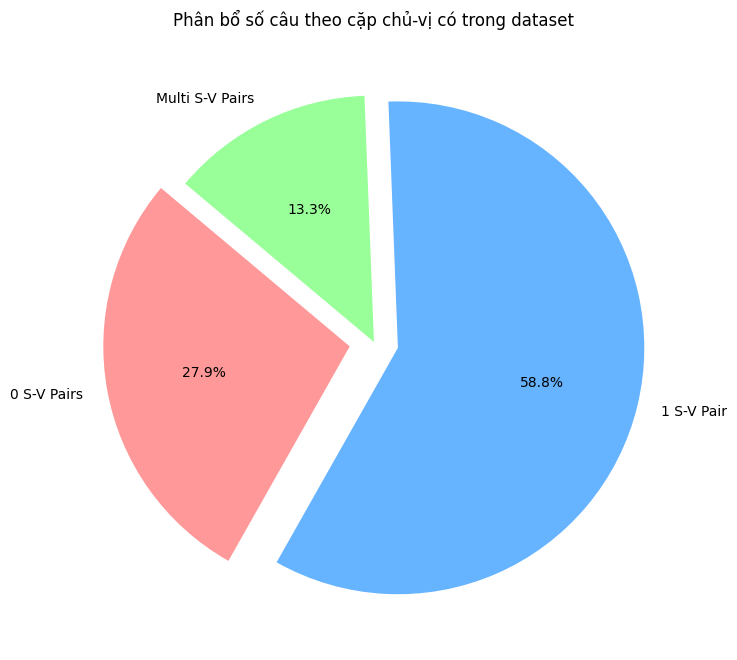

In [7]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Tải mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

def classify_sentence_by_dependency_v2(sentence):
    """
    Phân loại câu đơn/phức tạp dựa trên số lượng cặp chủ-vị ngữ và sự hiện diện của liên từ ('and', 'but', 'or'...).
    """
    doc = nlp(sentence)
    subject_verb_pairs = 0
    conjunctions = ["and", "but", "or", "nor", "for", "so", "yet"]

    # Đếm số lượng cặp chủ-vị ngữ
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject_verb_pairs += 1

    # Phân loại câu dựa trên số cặp chủ-vị ngữ và liên từ
    if subject_verb_pairs > 1:
        return "Complex", subject_verb_pairs
    for token in doc:
        if token.text.lower() in conjunctions:
            return "Complex", subject_verb_pairs

    # Nếu chỉ có một cặp chủ-vị ngữ, câu đơn
    if subject_verb_pairs == 1:
        return "Simple", subject_verb_pairs
    else:
        return "Complex", subject_verb_pairs

# Đọc bộ dữ liệu từ file
file_path = "data/vie.txt"  # Đảm bảo đường dẫn đúng với file của bạn

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Thống kê số cặp chủ-vị trong các câu
pair_count_stats = Counter()

# Áp dụng phân tích cú pháp và phân loại cho từng câu tiếng Anh trong file
for line in lines:
    if "\t" in line:  # Đảm bảo dòng có chứa dữ liệu (câu tiếng Anh và tiếng Việt)
        english_sentence, vietnamese_sentence, _ = line.split("\t")  # Tách câu tiếng Anh, tiếng Việt và thông tin bản quyền
        _, subject_verb_pairs = classify_sentence_by_dependency_v2(english_sentence.strip())
        pair_count_stats[subject_verb_pairs] += 1

# Tính phần trăm cho mỗi loại
total_sentences = sum(pair_count_stats.values())
percentages = {
    "0 S-V Pairs": (pair_count_stats[0] / total_sentences) * 100,
    "1 S-V Pair": (pair_count_stats[1] / total_sentences) * 100,
    "Multi S-V Pairs": (sum(count for pair, count in pair_count_stats.items() if pair > 1) / total_sentences) * 100
}

# Vẽ biểu đồ tròn
labels = list(percentages.keys())
sizes = list(percentages.values())
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0)  # Tách nhẹ 2 loại đầu ra khỏi biểu đồ

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Phân bổ số câu theo cặp chủ-vị có trong dataset')
plt.show()


In [ ]:
from pickle import load
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# one hot encode target sequence.
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

# define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:,0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
print('Vietnam Vocabulary Size: %d' % vie_vocab_size)
print('Vietnam Max Length: %d' % (vie_length))

# prepare training data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

# define model
model = define_model(vie_vocab_size, eng_vocab_size, vie_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.build(input_shape=(None, vie_length))
# summarize defined model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)
# fit model
filename = 'model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

English Vocabulary Size: 3459
English Max Length: 32
Vietnam Vocabulary Size: 2230
Vietnam Max Length: 39


C:\Users\quandam\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 39, 256)        │       570,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 32, 3459)       │       888,963 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,510,467 (9.58 MB)

 Trainable params: 2,510,467 (9.58 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Epoch 1/100

Epoch 1: val_loss improved from inf to 1.47088, saving model to model.keras
71/71 - 28s - 397ms/step - loss: 2.5427 - val_loss: 1.4709
Epoch 2/100

Epoch 2: val_loss improved from 1.47088 to 1.41731, saving model to model.keras
71/71 - 22s - 313ms/step - loss: 1.4395 - val_loss: 1.4173
Epoch 3/100

Epoch 3: val_loss improved from 1.41731 to 1.41168, saving model to model.keras
71/71 - 23s - 329ms/step - loss: 1.3973 - val_loss: 1.4117
Epoch 4/100

Epoch 4: val_loss did not improve from 1.41168
71/71 - 23s - 324ms/step - loss: 1.3679 - val_loss: 1.4348
Epoch 5/100

Epoch 5: val_loss improved from 1.41168 to 1.37434, saving model to model.keras
71/71 - 22s - 316ms/step - loss: 1.3579 - val_loss: 1.3743
Epoch 6/100

Epoch 6: val_loss did not improve from 1.37434
71/71 - 22s - 313ms/step - loss: 1.3387 - val_loss: 1.3780
Epoch 7/100

Epoch 7: val_loss improved fr

In [ ]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[bạn không cần phải ăn nó], target=[you dont have to eat it], predicted=[you dont need to to it]
src=[không biết là tôi còn không nữa], target=[i dont know if i still have it], predicted=[i dont know know if if you]
src=[tuyết tan hết trong một ngày], target=[the snow melted away in a day], predicted=[the snow melted through a a day]
src=[cô ấy đặt nó vào cái hộp], target=[she put it in the box], predicted=[she put the the the box]
src=[cô ấy chưa từng tới hokkaido], target=[she has never been to hokkaido], predicted=[she has to to to hokkaido]
src=[anh ấy không bao giờ nói dối], target=[hes never told a lie], predicted=[he never always lie lie]
src=[tom chạy sang giúp mary], target=[tom ran over to help mary], predicted=[tom is to to mary mary]
src=[sửa còn đắt hơn mua cái mới], target=[itll cost you more to fix it than to it would cost you to buy a new one], predicted=[there you you you you you you you to to to to to a a]
src=[tom đã dành cả ngày để chụp ảnh], target=[tom s

In [17]:
from pickle import load 
from tensorflow.keras.models import load_model 
import numpy as np 
model = load_model('model.keras') 
random_sentence = ['Mai đang ở nhà','Văn võ song toàn','Sao mày dại thế']
for _ in random_sentence:
    encoded_sentence = encode_sequences(vie_tokenizer, max_length([_]), [_]) 
    translation = predict_sequence(model, eng_tokenizer, encoded_sentence) 
    print(_ + ' -> ' + translation)


Mai đang ở nhà -> its is home
Văn võ song toàn -> this is happy
Sao mày dại thế -> how are a a wife


In [ ]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from numpy.random import shuffle
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')
# prepare english tokenizer
shuffle(dataset)
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[Tôi gọi để cảm ơn bạn], target=[Im calling to thank you], predicted=[i brother to to to at you]
src=[Tối hôm qua Tom không khóc], target=[Tom wasnt crying last night], predicted=[tom isnt know]
src=[Hôm nay là ngày đầu tiên của phần còn lại của đời bạn], target=[Today is the first day of the rest of your life], predicted=[this is a your your your informed]
src=[Bạn nên dán những bức hình đó vào album của bạn], target=[You should stick those pictures in your album], predicted=[you you a to to to for your your]
src=[Tôi khá hòa hợp với những người bạn cùng lớp mới], target=[I get on pretty well with my new classmates], predicted=[i going to to go to to to to the]
src=[Bạn có muốn đi chơi với chúng tôi không], target=[Do you want to hang with us], predicted=[do you want to to at me]
src=[Anh ấy hay giúp đỡ người khác], target=[He often helps others], predicted=[he lawyer type to idea]
src=[Trời mưa to suốt cả ngày], target=[It rained hard all day], predicted=[the is is very oth

C:\Users\quandam\AppData\Roaming\Python\Python311\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [ ]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[Tôi gọi để cảm ơn bạn], target=[Im calling to thank you], predicted=[i calling to thank you]
src=[Tối hôm qua Tom không khóc], target=[Tom wasnt crying last night], predicted=[tom didnt crying crying night]
src=[Hôm nay là ngày đầu tiên của phần còn lại của đời bạn], target=[Today is the first day of the rest of your life], predicted=[my is a the the of of of in your]
src=[Bạn nên dán những bức hình đó vào album của bạn], target=[You should stick those pictures in your album], predicted=[you you you a a your your album]
src=[Tôi khá hòa hợp với những người bạn cùng lớp mới], target=[I get on pretty well with my new classmates], predicted=[i have have a with a a new classmates]
src=[Bạn có muốn đi chơi với chúng tôi không], target=[Do you want to hang with us], predicted=[do you want to to with me]
src=[Anh ấy hay giúp đỡ người khác], target=[He often helps others], predicted=[he failed helps others]
src=[Trời mưa to suốt cả ngày], target=[It rained hard all day], predicted=[

In [ ]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[Tôi gọi để cảm ơn bạn], target=[Im calling to thank you], predicted=[i calling to thank you]
src=[Tối hôm qua Tom không khóc], target=[Tom wasnt crying last night], predicted=[tom didnt crying crying night]
src=[Hôm nay là ngày đầu tiên của phần còn lại của đời bạn], target=[Today is the first day of the rest of your life], predicted=[my is a the the of of of in your]
src=[Bạn nên dán những bức hình đó vào album của bạn], target=[You should stick those pictures in your album], predicted=[you you you a a your your album]
src=[Tôi khá hòa hợp với những người bạn cùng lớp mới], target=[I get on pretty well with my new classmates], predicted=[i have have a with a a new classmates]
src=[Bạn có muốn đi chơi với chúng tôi không], target=[Do you want to hang with us], predicted=[do you want to to with me]
src=[Anh ấy hay giúp đỡ người khác], target=[He often helps others], predicted=[he failed helps others]
src=[Trời mưa to suốt cả ngày], target=[It rained hard all day], predicted=[

In [16]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 100:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[bạn không cần phải ăn nó], target=[you dont have to eat it], predicted=[you dont need to to it]
src=[không biết là tôi còn không nữa], target=[i dont know if i still have it], predicted=[i dont know know if if you]
src=[tuyết tan hết trong một ngày], target=[the snow melted away in a day], predicted=[the snow melted through a a day]
src=[cô ấy đặt nó vào cái hộp], target=[she put it in the box], predicted=[she put the the the box]
src=[cô ấy chưa từng tới hokkaido], target=[she has never been to hokkaido], predicted=[she has to to to hokkaido]
src=[anh ấy không bao giờ nói dối], target=[hes never told a lie], predicted=[he never always lie lie]
src=[tom chạy sang giúp mary], target=[tom ran over to help mary], predicted=[tom is to to mary mary]
src=[sửa còn đắt hơn mua cái mới], target=[itll cost you more to fix it than to it would cost you to buy a new one], predicted=[there you you you you you you you to to to to to a a]
src=[tom đã dành cả ngày để chụp ảnh], target=[tom s